In [1]:
%matplotlib inline
from astropy.table import Table
from astropy.io import fits as pf
import pylab as p
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
from matplotlib import cm
cool_cmap = cm.hot_r
cool_cmap.set_under('w')

In [2]:
#change path according to the user
path_to_folder = "/Users/abhi/py_workspace/Lrg_healpy/"
a=hp.fitsfunc.read_map(path_to_folder+"wise_sys/wise_sys_map_p8.fits", field=0, hdu=1, h=False, verbose=True, memmap=False)
b=hp.fitsfunc.read_map(path_to_folder+"wise_sys/wise_sys_map_p8.fits", field=1, hdu=1, h=False, verbose=True, memmap=False)
c=hp.fitsfunc.read_map(path_to_folder+"wise_sys/wise_sys_map_p8.fits", field=2, hdu=1, h=False, verbose=True, memmap=False)

NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/Users/abhi/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/healpy/pixelfunc.py:270: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


14.4482421875 172.859375


/Users/abhi/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/ma/core.py:2200: RuntimeWarning: invalid value encountered in less_equal
  condition = umath.less_equal(mabs(xnew - value), atol + rtol * mabs(value))
/Users/abhi/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/healpy/projaxes.py:998: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/abhi/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/healpy/projaxes.py:999: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


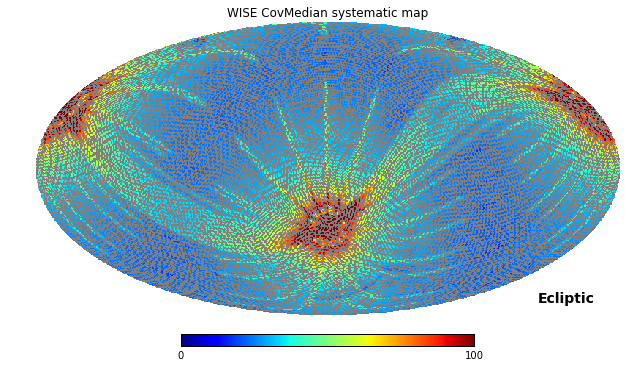

In [3]:
hp.mollview(a,coord=['G','E'],title="WISE CovMedian systematic map",max = 100,min =0)
print min(a), max(a)

In [4]:
NSIDE =64
w1_covMed_map_nn = np.zeros(hp.nside2npix(NSIDE))
w1_Med_map_nn = np.zeros(hp.nside2npix(NSIDE))
w1_Moonlev_map_nn = np.zeros(hp.nside2npix(NSIDE))
gen_pix = np.arange(hp.nside2npix(NSIDE))
gen_theta,gen_phi = hp.pixelfunc.pix2ang(NSIDE,gen_pix, nest=False)

print len(a), len(np.zeros(hp.nside2npix(NSIDE)))


#hp.mollview(gen_pix,coord=['G','E'],title="WISE CovMedian systematic map",max = 50,min =0)
print len(gen_theta), len(gen_phi)

for k, foo in enumerate(a):
    if np.isnan(a[k]) == True:
        j = hp.pixelfunc.get_all_neighbours(NSIDE,gen_theta[k],gen_phi[k], nest=False)
        tmp_a = a[j]
        tmp_b = b[j]
        tmp_c = c[j]
        w1_covMed_map_nn[k]= np.mean(tmp_a[~np.isnan(tmp_a)])
        w1_Med_map_nn[k]= np.mean(tmp_b[~np.isnan(tmp_b)])
        w1_Moonlev_map_nn[k]= np.mean(tmp_c[~np.isnan(tmp_c)])
    else :
        w1_covMed_map_nn[k]= a[k]
        w1_Med_map_nn[k]= b[k]
        w1_Moonlev_map_nn[k]= c[k]

print "done"

49152 49152
49152 49152
done


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


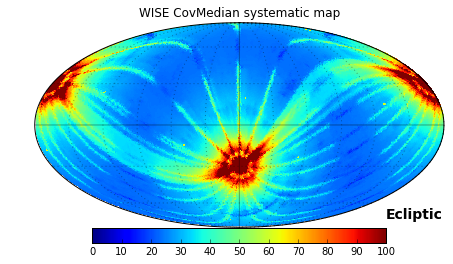

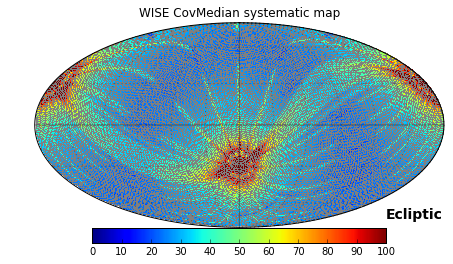

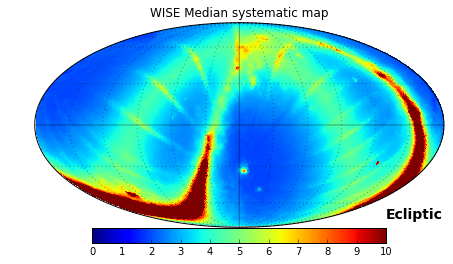

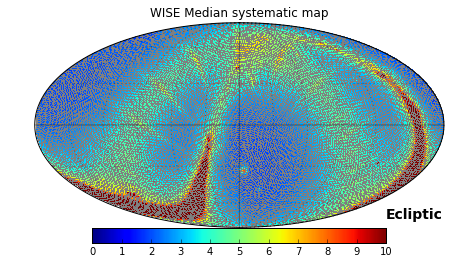

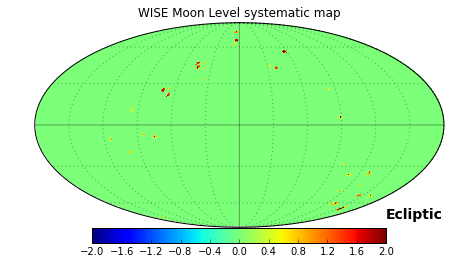

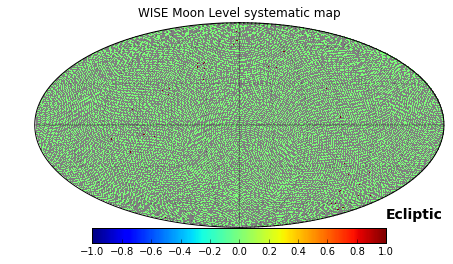

In [5]:
#Comparing Old maps with new ones.

hp.mollview(w1_covMed_map_nn,coord=['G','E'],title="WISE CovMedian systematic map",max = 100,min =0,cbar=None)
hp.graticule(alpha=0.35)
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
cmap = fig.colorbar(image, ax=ax,orientation="horizontal",shrink=0.5,anchor=(0.5,2.90))

hp.mollview(a,coord=['G','E'],title="WISE CovMedian systematic map",max = 100,min =0,cbar=None)
hp.graticule(alpha=0.35)
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
cmap = fig.colorbar(image, ax=ax,orientation="horizontal",shrink=0.5,anchor=(0.5,2.90))

hp.mollview(w1_Med_map_nn,coord=['G','E'],title="WISE Median systematic map",max = 10,min =0,cbar=None)
hp.graticule(alpha=0.35)
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
cmap = fig.colorbar(image, ax=ax,orientation="horizontal",shrink=0.5,anchor=(0.5,2.90))

hp.mollview(b,coord=['G','E'],title="WISE Median systematic map",max = 10,min =0,cbar=None)
hp.graticule(alpha=0.35)
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
cmap = fig.colorbar(image, ax=ax,orientation="horizontal",shrink=0.5,anchor=(0.5,2.90))

hp.mollview(w1_Moonlev_map_nn,coord=['G','E'],title="WISE Moon Level systematic map",max = 2,min =-2,cbar=None)
hp.graticule(alpha=0.35)
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
cmap = fig.colorbar(image, ax=ax,orientation="horizontal",shrink=0.5,anchor=(0.5,2.90))

hp.mollview(c,coord=['G','E'],title="WISE Moon Level systematic map",max = 1,min =-1,cbar=None)
hp.graticule(alpha=0.35)
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
cmap = fig.colorbar(image, ax=ax,orientation="horizontal",shrink=0.5,anchor=(0.5,2.90))



In [6]:
#checking for missing or NAN data.
print len(w1_Med_map_nn-b),max(w1_Med_map_nn-b),min(w1_Med_map_nn-b)
print len(w1_Med_map_nn[np.isnan(w1_Med_map_nn)])
print len(w1_covMed_map_nn[np.isnan(w1_covMed_map_nn)])
print len(w1_Moonlev_map_nn[np.isnan(w1_Moonlev_map_nn)])

#hp.fitsfunc.write_map("wise_sys/wise_sys_map_p8_NN.fits",(w1_covMed_map_nn,w1_Med_map_nn,w1_Moonlev_map_nn), column_names= ["w1_CovMed","w1_Med","w1_Moon"])

49152 0.0 0.0
0
0
0


In [7]:
w1_covMed_map_p2 = hp.pixelfunc.ud_grade(w1_covMed_map_nn,nside_out=128, pess= True)
w1_Med_map_p2 =  hp.pixelfunc.ud_grade(w1_Med_map_nn,nside_out=128, pess= True)
w1_Moonlev_map_p2 = hp.pixelfunc.ud_grade(w1_Moonlev_map_nn,nside_out=128, pess= True)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


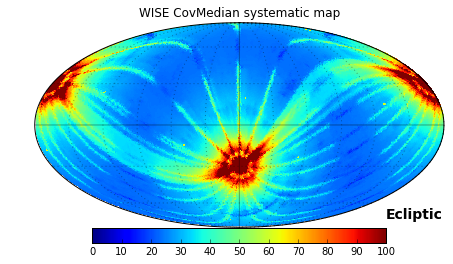

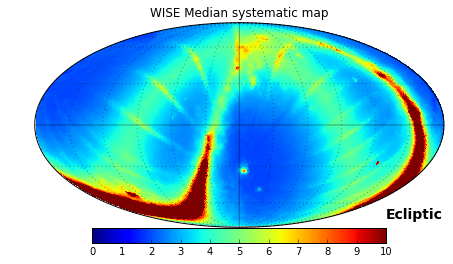

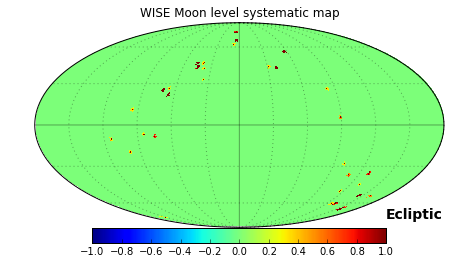

In [8]:
hp.mollview(w1_covMed_map_p2,coord=['G','E'],title="WISE CovMedian systematic map",max = 100,min =0,cbar=None)
hp.graticule(alpha=0.35)
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
cmap = fig.colorbar(image, ax=ax,orientation="horizontal",shrink=0.5,anchor=(0.5,2.90))


hp.mollview(w1_Med_map_p2,coord=['G','E'],title="WISE Median systematic map",max = 10,min =0,cbar=None)
hp.graticule(alpha=0.35)
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
cmap = fig.colorbar(image, ax=ax,orientation="horizontal",shrink=0.5,anchor=(0.5,2.90))


hp.mollview(w1_Moonlev_map_p2,coord=['G','E'],title="WISE Moon level systematic map",max = 1,min =-1,cbar=None)
hp.graticule(alpha=0.35)
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
cmap = fig.colorbar(image, ax=ax,orientation="horizontal",shrink=0.5,anchor=(0.5,2.90))



In [23]:
#hp.fitsfunc.write_map("wise_sys/wise_sys_map_p05_NN.fits",(w1_covMed_map_p05,w1_Med_map_p05,w1_Moonlev_map_p05), column_names= ["w1_CovMed","w1_Med","w1_Moon"])
#hp.fitsfunc.write_map("wise_sys/wise_sys_map_p2_NN.fits",(w1_covMed_map_p2,w1_Med_map_p2,w1_Moonlev_map_p2), column_names= ["w1_CovMed","w1_Med","w1_Moon"])

In [13]:
(hp.nside2resol(512)/np.pi*180.)**2.

0.013113963206424483